In [1]:
import networkx as nx
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy

In [2]:
n = 100
lambdas = [1, 2, 3, 4, 5, 8]
lambdasToString = [str(l).replace('.', 'p') for l in lambdas]
conflictGraphType = "friends"
mainProjectDist = "trunc_exponential"
secondaryProjectDist = "trunc_gaussian"

## Input analysis

In [3]:
def project_term(x):
    # Requires definition of lambda_
    res = 0
    # project preference term
    for u in range(n):
        for t in range(numOfProjects):
            if (u, t) in c:
                res += c[(u, t)] * x[(u, t)]
    res *= lambda_
    return res

def conflict_term(x):
    res = 0
    for e in edges:
        u, v = e
        inner_sum = 0
        for t in range(numOfProjects):
            inner_sum += x[(u, t)] * x[(v, t)]
        res += w[(u, v)] * (1 - inner_sum)
    return res
    
def f(x):
    # Requires definition of lambda_
    return project_term(x) + conflict_term(x) 

In [4]:
with open(f'./inputs/graph_n{n}_{conflictGraphType}_{mainProjectDist}_{secondaryProjectDist}.pickle', 'rb') as file:
    numOfProjects = pickle.load(file)
    c = pickle.load(file)
    w = pickle.load(file)
    edges = pickle.load(file)
    wE = sum([w[e] for e in w])

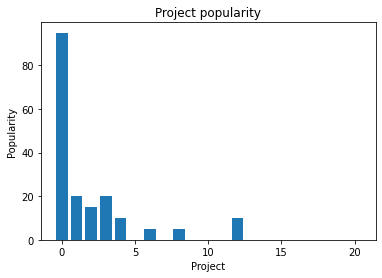

In [5]:
proj_popularity = np.zeros(numOfProjects)
for u in range(n):
    for p in range(numOfProjects):
        if (u, p) in c:
            proj_popularity[p] += c[(u, p)]
            
xs = range(numOfProjects)
ys = proj_popularity

plt.bar(xs, ys)
plt.xlabel('Project')
plt.ylabel('Popularity')
plt.title(f'Project popularity')

plt.show()

number of (conflict) edges = 4718


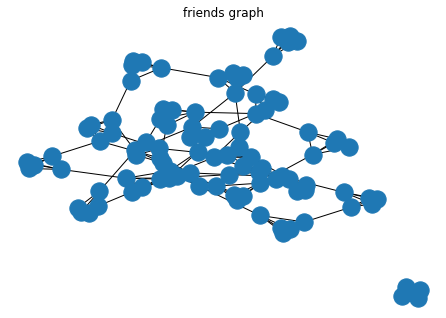

In [6]:
G = nx.Graph()
G.add_edges_from(edges)
if conflictGraphType == 'friends':
    G = nx.complement(G)
    
print(f'number of (conflict) edges = {len(edges)}')
nx.draw(G, pos=nx.spring_layout(G))
plt.title(f'{conflictGraphType} graph')
plt.show()

## Results analysis

In [7]:
settings = dict()
results = dict()
times = dict()

for l in lambdasToString:
    with open(f'./results/graph_n{n}_lambda{l}_{conflictGraphType}_{mainProjectDist}_{secondaryProjectDist}.pickle', 'rb') as file:
        settings[l] = pickle.load(file)
        edges = pickle.load(file)
        results[l] = pickle.load(file)
        times[l] = pickle.load(file)
        file.close()


======= lambda = 1 ==========
obj_frac = 6605.199999999439
obj_round = 6500.2, proj = 1887.2, conflict = 4613
obj_opt = 6604.2, proj = 1887.2, conflict = 4717.0
obj_project = 6457.2, proj = 1887.2, conflict = 4570.0
obj_conflict = 5330.34, proj = 613.34, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.9842524454135247


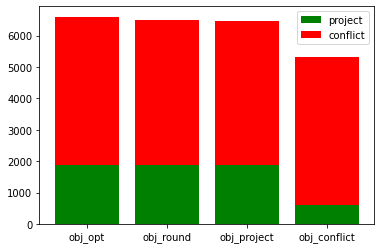


======= lambda = 2 ==========
obj_frac = 8366.47692307717
obj_round = 8392.4, proj = 3774.4, conflict = 4618
obj_opt = 8491.4, proj = 3774.4, conflict = 4717.0
obj_project = 8344.4, proj = 3774.4, conflict = 4570.0
obj_conflict = 5943.68, proj = 1226.68, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.9883411451586311


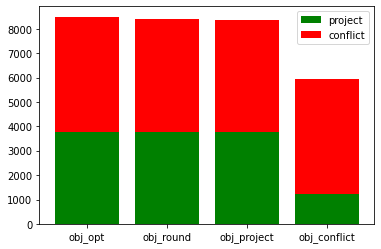


======= lambda = 3 ==========
obj_frac = 10253.215384614998
obj_round = 10279.599999999999, proj = 5661.599999999999, conflict = 4618
obj_opt = 10378.599999999999, proj = 5661.599999999999, conflict = 4717.0
obj_project = 10231.599999999999, proj = 5661.599999999999, conflict = 4570.0
obj_conflict = 6557.02, proj = 1840.02, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.9904611411943808


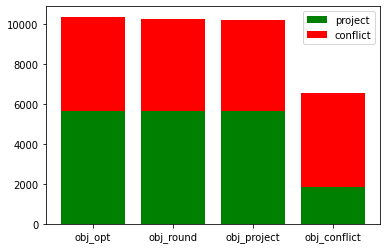


======= lambda = 4 ==========
obj_frac = 12140.415384614485
obj_round = 12160.8, proj = 7548.8, conflict = 4612
obj_opt = 12265.8, proj = 7548.8, conflict = 4717.0
obj_project = 12118.8, proj = 7548.8, conflict = 4570.0
obj_conflict = 7170.360000000001, proj = 2453.36, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.9914396125813236


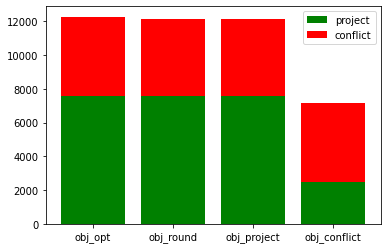


======= lambda = 5 ==========
obj_frac = 14027.615384614235
obj_round = 14048.0, proj = 9436.0, conflict = 4612
obj_opt = 14153.0, proj = 9436.0, conflict = 4717.0
obj_project = 14006.0, proj = 9436.0, conflict = 4570.0
obj_conflict = 7783.700000000001, proj = 3066.7000000000003, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.9925810782166326


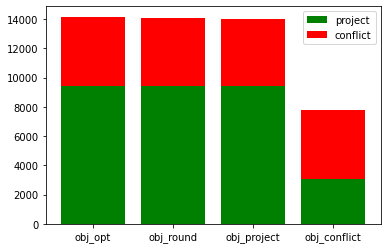


======= lambda = 8 ==========
obj_frac = 19689.523076924233
obj_round = 19703.6, proj = 15097.6, conflict = 4606
obj_opt = 19814.6, proj = 15097.6, conflict = 4717.0
obj_project = 19667.6, proj = 15097.6, conflict = 4570.0
obj_conflict = 9623.720000000001, proj = 4906.72, conflict = 4717.0
approx ratio (obj_round / obj_opt) = 0.994398070109919


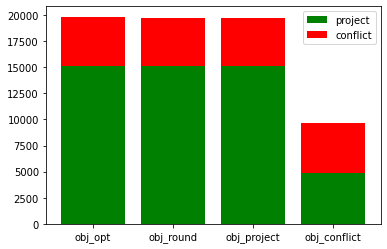

In [8]:
obj_frac = dict()
obj_opt = dict()
obj_round = dict()
obj_project = dict()
obj_conflict = dict()

x_frac = dict()
x_round = dict()
x_opt = dict()
x_project = dict()
x_conflict = dict()

approx_ratio = dict()

for i in range(len(lambdas)):
    l = lambdasToString[i]
    lambda_ = lambdas[i] * wE/ n
    res = results[l]
    obj_frac[l] = res["frac_val"]
    obj_opt[l] = res["quad_val"]
    obj_round[l] = res["rounded_val"]
    obj_project[l] = res["project_val"]
    obj_conflict[l] = res["conflict_val"]
    
    x_frac[l] = res["frac_sol"]
    x_opt[l] = res["quad_sol"]
    x_round[l] = res["rounded_sol"]
    x_project[l] = res["project_sol"]
    x_conflict[l] = res["conflict_sol"]
    
    approx_ratio[l] = obj_round[l] / obj_opt[l]
    

    print(f'\n======= lambda = {lambdas[i]} ==========')
    print(f'obj_frac = {obj_frac[l]}')
    print(f'obj_round = {obj_round[l]}, proj = {project_term(x_round[l])}, conflict = {conflict_term(x_round[l])}')
    print(f'obj_opt = {obj_opt[l]}, proj = {project_term(x_opt[l])}, conflict = {conflict_term(x_opt[l])}')
    print(f'obj_project = {obj_project[l]}, proj = {project_term(x_project[l])}, conflict = {conflict_term(x_project[l])}')
    print(f'obj_conflict = {obj_conflict[l]}, proj = {project_term(x_conflict[l])}, conflict = {conflict_term(x_conflict[l])}')
    print(f'approx ratio (obj_round / obj_opt) = {obj_round[l] / obj_opt[l]}')
    
    ind = ["obj_opt", "obj_round", "obj_project", "obj_conflict"]
    xs = [x_opt[l], x_round[l], x_project[l], x_conflict[l]]
    
    a = np.array([project_term(x) for x in xs])
    b = np.array([conflict_term(x) for x in xs])

    p1 = plt.bar(ind, a, color='green', label="project")
    p2 = plt.bar(ind, b, color='#FF0000', bottom=sum([a]), label="conflict")
    
    plt.legend()
    plt.show()

### Reconstruct optimal teams

In [10]:
def construct_teams(x):
    teams = dict()
    for p in range(numOfProjects):
        teams[p] = []

    for e in x:
        u, p = e
        if x[e] == 1:
            u, p = e
            teams[p].append(u)
            
    for p in range(numOfProjects):
        teams[p].sort()
        
    return teams
            
teams_opt = dict()
for l in lambdasToString:    
    numOfProjects = settings[l]["numOfProjects"]
    teams_opt[l] = construct_teams(x_opt[l])
    
    l_val = l.replace('p', '.')
    print(f'\n======== lambda {l_val} ==========')
    print(teams_opt[l])


======== lambda 1 ==========
{0: [45, 46, 47, 48, 49], 1: [95, 96, 97, 98, 99], 2: [80, 81, 82, 83, 84], 3: [30, 31, 32, 33, 34], 4: [0, 1, 2, 3, 4], 5: [40, 41, 42, 43, 44], 6: [70, 71, 72, 73, 74], 7: [15, 16, 17, 18, 19], 8: [65, 66, 67, 68, 69], 9: [25, 28, 29], 10: [55, 56, 57, 58, 59], 11: [35, 36, 37, 38, 39], 12: [60, 61, 62, 63, 64], 13: [26, 27], 14: [50, 51, 52, 53, 54], 15: [90, 91, 92, 93, 94], 16: [75, 76, 77, 78, 79], 17: [20, 21, 22, 23, 24], 18: [10, 11, 12, 13, 14], 19: [85, 86, 87, 88, 89], 20: [5, 6, 7, 8, 9]}

======== lambda 2 ==========
{0: [5, 6, 7, 8, 9], 1: [95, 96, 97, 98, 99], 2: [45, 46, 47, 48, 49], 3: [50, 51, 52, 53, 54], 4: [0, 1, 2, 3, 4], 5: [85, 86, 87, 88, 89], 6: [70, 71, 72, 73, 74], 7: [26, 29], 8: [65, 66, 67, 68, 69], 9: [90, 91, 92, 93, 94], 10: [80, 81, 82, 83, 84], 11: [30, 31, 32, 33, 34], 12: [60, 61, 62, 63, 64], 13: [25, 27, 28], 14: [15, 16, 17, 18, 19], 15: [20, 21, 22, 23, 24], 16: [75, 76, 77, 78, 79], 17: [35, 36, 37, 38, 39], 18: 

### Reconstruct teams (pipage rounding algorithm)

In [11]:
teams_round = dict()
for l in lambdasToString:    
    numOfProjects = settings[l]["numOfProjects"]
    teams_round[l] = construct_teams(x_round[l])
    l_val = l.replace('p', '.')
    print(f'\n======== lambda {l_val} ==========')
    print(teams_round[l])


======== lambda 1 ==========
{0: [45, 46, 47, 48, 49], 1: [95, 96, 97, 98, 99], 2: [80, 81, 82, 83, 84], 3: [30, 31, 32, 33, 34], 4: [0, 1, 2, 3, 4], 5: [5, 17, 36, 54, 87], 6: [70, 71, 72, 73, 74], 7: [6, 22, 38, 53], 8: [65, 66, 67, 68, 69], 9: [8, 20, 35, 58, 92], 10: [7, 23, 37, 57, 86], 11: [9, 19, 39, 55], 12: [60, 61, 62, 63, 64], 13: [10, 27, 51, 75], 14: [11, 24, 43, 59, 89], 15: [12, 18, 42, 76], 16: [13, 26, 44, 78, 93], 17: [14, 21, 50, 79], 18: [15, 28, 52, 77, 94], 19: [16, 29, 41, 85], 20: [25, 40, 56, 91, 94]}

======== lambda 2 ==========
{0: [5, 6, 7, 8, 9], 1: [95, 96, 97, 98, 99], 2: [45, 46, 47, 48, 49], 3: [50, 51, 52, 53, 54], 4: [0, 1, 2, 3, 4], 5: [11, 26, 40, 59, 87], 6: [70, 71, 72, 73, 74], 7: [10, 23, 43, 58, 88], 8: [65, 66, 67, 68, 69], 9: [12, 25, 35, 78, 86], 10: [13, 22, 38, 80], 11: [14, 27, 56, 82], 12: [60, 61, 62, 63, 64], 13: [15, 28, 39, 79], 14: [16, 24, 55, 76], 15: [17, 31, 37, 77, 93], 16: [18, 30, 44, 81], 17: [20, 32, 36, 84, 89], 18: [19,

### Compare $\lambda \sum_v \sum_t c_{vt}x_{vt}$ and $w(E)$
If $\alpha = \lambda \sum_v \sum_t c_{vt}x_{vt} - w(E) \geq 0$, then we can apply the pipage algorithm.
Otherwise, the guarantees of the algorithm do not hold.

In [12]:
print(f'w(E) = {wE}')
for l, lstr in zip(lambdas, lambdasToString):
    lambda_ = l * wE / n
    projectsVal = project_term(x_round[lstr])
    print(f'\n===== lambda = {l} ======')
    print(f'projects term value = {projectsVal}')
    print(f'a = {projectsVal - wE}')

w(E) = 4718

===== lambda = 1 ======
projects term value = 1887.2
a = -2830.8

===== lambda = 2 ======
projects term value = 3774.4
a = -943.5999999999999

===== lambda = 3 ======
projects term value = 5661.599999999999
a = 943.5999999999995

===== lambda = 4 ======
projects term value = 7548.8
a = 2830.8

===== lambda = 5 ======
projects term value = 9436.0
a = 4718.0

===== lambda = 8 ======
projects term value = 15097.6
a = 10379.6


### How many students got a project they like?

In [13]:
def calc_preference_stats(teams):
    res = 0
    students = []
    for t in teams:
        team = teams[t]
        for u in team:
            res += 1 if (u, t) in c else 0
            students.append(u)
    res /= n
    return res, students


for l in lambdasToString:
    print(f'\n====== lambda = {l_val} =======')
    
    teams = teams_opt[l]
    res, students = calc_preference_stats(teams)
    
    l_val = l.replace('p', '.')
    print(f'(Optimal teams) percentage of students that got a project they like = {res}')
#     print(f'list of students that got a project they like: {students}')
    
    teams = teams_round[l]
    res, students = calc_preference_stats(teams)
    
    l_val = l.replace('p', '.')
    print(f'(Pipage teams) percentage of students that got a project they like = {res}')
#     print(f'list of students that got a project they like: {students}')



====== lambda = 8 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of students that got a project they like = 0.4

====== lambda = 1 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of students that got a project they like = 0.4

====== lambda = 2 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of students that got a project they like = 0.4

====== lambda = 3 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of students that got a project they like = 0.4

====== lambda = 4 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of students that got a project they like = 0.4

====== lambda = 5 =======
(Optimal teams) percentage of students that got a project they like = 0.4
(Pipage teams) percentage of 

### How many teammate friends each student has? (lambda = 5)

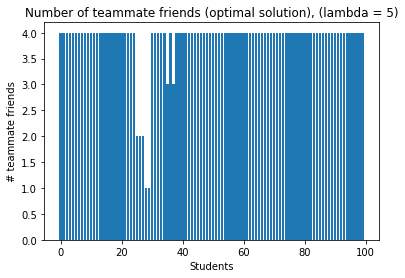

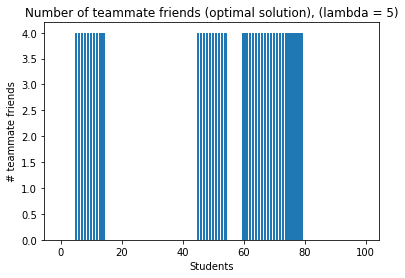

avgFriendsOpt = 3.86
avgFriendsRound = 1.6


In [14]:
l = "5"
teams1 = teams_opt[l]
teams2 = teams_round[l]

def count_friends(teams):
    friends = dict()
    for team in teams.values():
        for u in team:
            friends[u] = len([1 for v in team if u != v and (u, v) not in w and (v, u) not in w])
    return friends

friends_opt = count_friends(teams1)
friends_round = count_friends(teams2)

avgFriendsOpt = sum(friends_opt.values()) / n
avgFriendsRound = sum(friends_round.values()) / n

xs = friends_opt.keys()
ys = friends_opt.values()

plt.bar(xs, ys)
plt.xlabel('Students')
plt.ylabel('# teammate friends')
plt.title(f'Number of teammate friends (optimal solution), (lambda = {l})')

plt.show()

xs = friends_round.keys()
ys = friends_round.values()

plt.bar(xs, ys)
plt.xlabel('Students')
plt.ylabel('# teammate friends')
plt.title(f'Number of teammate friends (optimal solution), (lambda = {l})')

plt.show()

print(f'avgFriendsOpt = {avgFriendsOpt}')
print(f'avgFriendsRound = {avgFriendsRound}')

### Teams comparison (lambda = 3)

In [15]:
l = '3'
tm = teams_round[l]
tm_opt = teams_opt[l]
print(f'optimal team {tm_opt}')
print(f'pipage team {tm}')
sameTeamsAndProject = len([i for i in range(numOfProjects) if tm[i] == tm_opt[i]])
print(f'number of identical teams and projects = {sameTeamsAndProject}')
sameTeams = len([t for t in tm if t in tm_opt])
print(f'number of identical teams = {sameTeams}')


optimal team {0: [10, 11, 12, 13, 14], 1: [75, 76, 77, 78, 79], 2: [45, 46, 47, 48, 49], 3: [50, 51, 52, 53, 54], 4: [5, 6, 7, 8, 9], 5: [85, 86, 87, 88, 89], 6: [70, 71, 72, 73, 74], 7: [0, 1, 2, 3, 4], 8: [65, 66, 67, 68, 69], 9: [90, 91, 92, 93, 94], 10: [80, 81, 82, 83, 84], 11: [55, 56, 57, 58, 59], 12: [60, 61, 62, 63, 64], 13: [30, 31, 32, 33, 34], 14: [20, 21, 22, 23, 24], 15: [28, 29], 16: [35, 36, 37, 38, 39], 17: [25, 26, 27], 18: [95, 96, 97, 98, 99], 19: [40, 41, 42, 43, 44], 20: [15, 16, 17, 18, 19]}
pipage team {0: [10, 11, 12, 13, 14], 1: [75, 76, 77, 78, 79], 2: [45, 46, 47, 48, 49], 3: [50, 51, 52, 53, 54], 4: [5, 6, 7, 8, 9], 5: [1, 22, 37, 59], 6: [70, 71, 72, 73, 74], 7: [0, 23, 35, 81], 8: [65, 66, 67, 68, 69], 9: [3, 25, 36, 58, 91], 10: [4, 27, 44, 86, 97], 11: [2, 26, 42, 82, 95], 12: [60, 61, 62, 63, 64], 13: [15, 29, 41, 85], 14: [16, 24, 39, 80, 98], 15: [17, 28, 40, 89, 99], 16: [18, 31, 55, 87], 17: [19, 32, 38, 83], 18: [20, 43, 84, 88], 19: [21, 34, 56, 

#### Remark
Although the number of identical teams and projects is only 8, note that it might be possible to
re-assign teams to different projects and achieve the same objective value. See the following paragraph.

### Comparing solutions of different lambdas given a fixed objective function

In [16]:
l1 = '3'
l2 = '4'
l3 = '5'
# optimal teams
x1 = x_opt[l1]
x2 = x_opt[l2]
x3 = x_opt[l3]
lambda_ = 1 * wE / n
print('======= Optimal teams ==========')
print(f'Using f with lambda = {l1} (for evaluating both solutions)')
print(f'sol for lambda = {l1}: f = {f(x1)}, project = {project_term(x1)}, conflict = {conflict_term(x1)}')
print(f'sol for lambda = {l2}: f = {f(x2)}, project = {project_term(x2)}, conflict = {conflict_term(x2)}')
print(f'sol for lambda = {l3}: f = {f(x3)}, project = {project_term(x3)}, conflict = {conflict_term(x3)}')

# pipage teams
x1 = x_round[l1]
x2 = x_round[l2]
x3 = x_round[l3]
lambda_ = 1 * wE / n
print('\n======= Pipage teams ========')
print(f'Using f with lambda = {l1} (for evaluating both solutions)')
print(f'sol for lambda = {l1}: f = {f(x1)}, project = {project_term(x1)}, conflict = {conflict_term(x1)}')
print(f'sol for lambda = {l2}: f = {f(x2)}, project = {project_term(x2)}, conflict = {conflict_term(x2)}')
print(f'sol for lambda = {l3}: f = {f(x3)}, project = {project_term(x3)}, conflict = {conflict_term(x3)}')



======= Optimal teams ==========
Using f with lambda = 3 (for evaluating both solutions)
sol for lambda = 3: f = 6604.2, project = 1887.2, conflict = 4717.0
sol for lambda = 4: f = 6604.2, project = 1887.2, conflict = 4717.0
sol for lambda = 5: f = 6604.2, project = 1887.2, conflict = 4717.0

======= Pipage teams ========
Using f with lambda = 3 (for evaluating both solutions)
sol for lambda = 3: f = 6505.2, project = 1887.2, conflict = 4618
sol for lambda = 4: f = 6499.2, project = 1887.2, conflict = 4612
sol for lambda = 5: f = 6499.2, project = 1887.2, conflict = 4612


#### Remark
The optimal solution remains the same for different lambdas (?).\
Can you think of a counter-example?

Is the same is not true for the pipage algorithm solution.

### In-team Conflicts


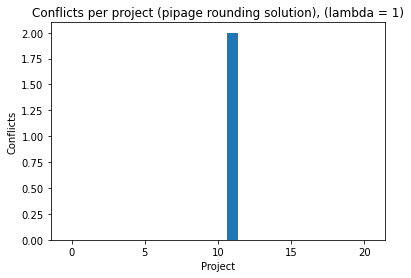

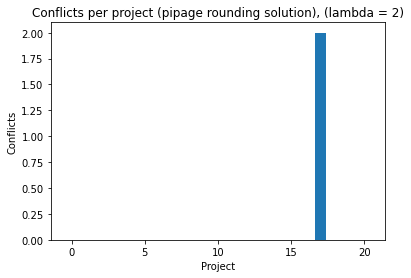

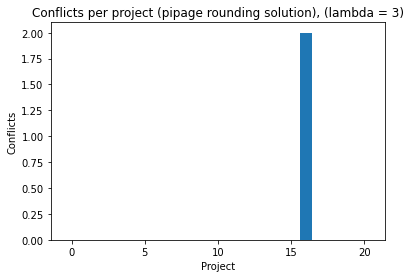

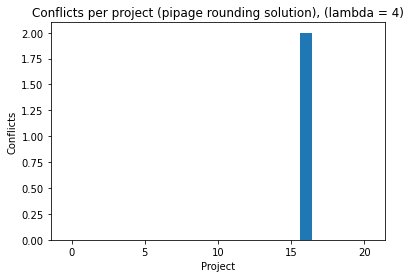

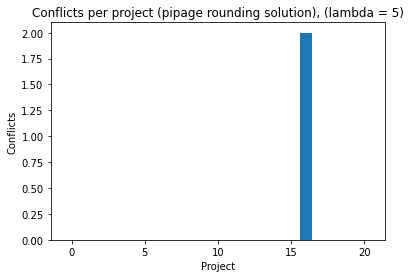

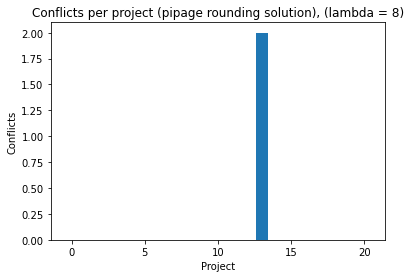

avg number of conflicts in a team = 0.1
avg number of conflicts in a team = 0.1
avg number of conflicts in a team = 0.1
avg number of conflicts in a team = 0.1
avg number of conflicts in a team = 0.1
avg number of conflicts in a team = 0.1


In [17]:
# conflicts for optimal teams
def calc_conflicts(teams):
    conflicts = dict()
    for t in teams:
        team = teams[t]
        conflicts[t] = 0
        if team:
            conflicts[t] = sum([1 for u in team for v in team if u < v and (u, v) in edges or (v, u) in edges])
        
    return conflicts

conflicts_opt = dict()
avgConflicts_opt = dict()
for l in lambdasToString:
    conflicts_opt[l] = calc_conflicts(teams_opt[l])
    nonEmptyTeams = [t for t in teams_opt[l] if t]
    avgConflicts_opt[l] = sum(conflicts_opt[l].values()) / len(nonEmptyTeams)

    xs = conflicts_opt[l].keys()
    ys = conflicts_opt[l].values()

    plt.bar(xs, ys)
    plt.xlabel('Project')
    plt.ylabel('Conflicts')
    plt.title(f'Conflicts per project (pipage rounding solution), (lambda = {l})')

    plt.show()

for l in lambdasToString:
    print(f'avg number of conflicts in a team = {avgConflicts_opt[l]}')

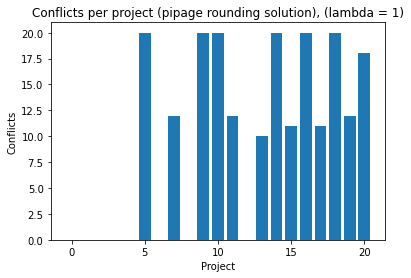

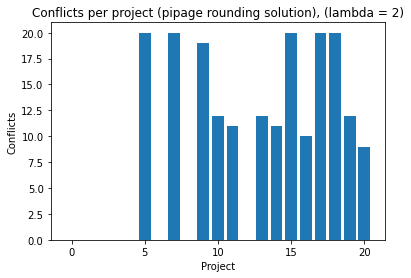

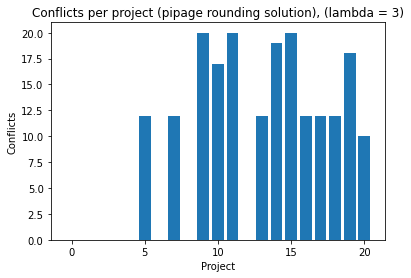

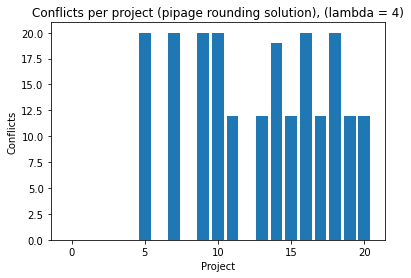

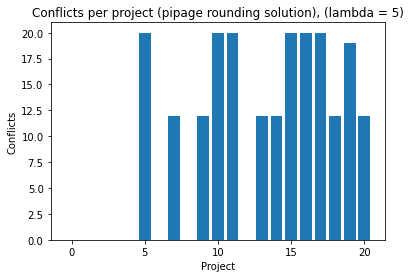

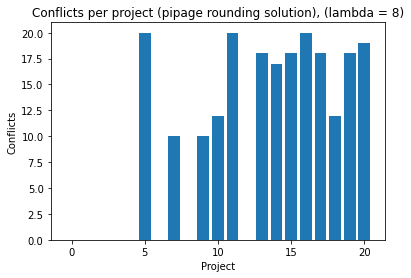

avg number of conflicts in a team = 10.3
avg number of conflicts in a team = 9.8
avg number of conflicts in a team = 9.8
avg number of conflicts in a team = 10.55
avg number of conflicts in a team = 10.55
avg number of conflicts in a team = 10.6


In [18]:
# conflicts for pipage algorithm teams
conflicts = dict()
avgConflicts = dict()
for l in lambdasToString:
    conflicts[l] = calc_conflicts(teams_round[l])
    nonEmptyTeams = [t for t in teams_round[l] if t]
    avgConflicts[l] = sum(conflicts[l].values()) / len(nonEmptyTeams)

    xs = conflicts[l].keys()
    ys = conflicts[l].values()

    plt.bar(xs, ys)
    plt.xlabel('Project')
    plt.ylabel('Conflicts')
    plt.title(f'Conflicts per project (pipage rounding solution), (lambda = {l})')

    plt.show()

for l in lambdasToString:
    print(f'avg number of conflicts in a team = {avgConflicts[l]}')

### Time (seconds) for each step

In [19]:
times["1"]

{'read_input': 0.011780261993408203,
 'construct_model': 1.225682258605957,
 'optimize_quad': 120.04844832420349,
 'relax_model': 4.347615480422974,
 'optimize_relaxation': 2.8940160274505615,
 'rounding': 1.2342755794525146}

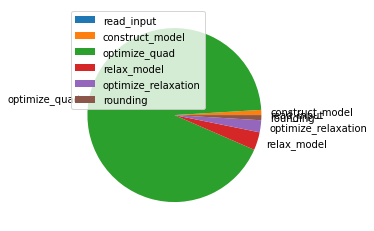

In [20]:
plt.pie(times["1"].values(), labels=times["1"].keys())
plt.legend(loc='upper left')
plt.show()